In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'
from math import log2, radians, cos, sqrt

pd.options.display.max_rows = 4000

from matplotlib.colors import ListedColormap

In [2]:
def midval(a, b, c):
    maxx = max(max(a,b), c)
    minn = min(min(a, b), c)
    
    return a + b + c - maxx - minn

Text(0, 0.5, 'alt prof')

Text(0, 0.5, 'alt prof')

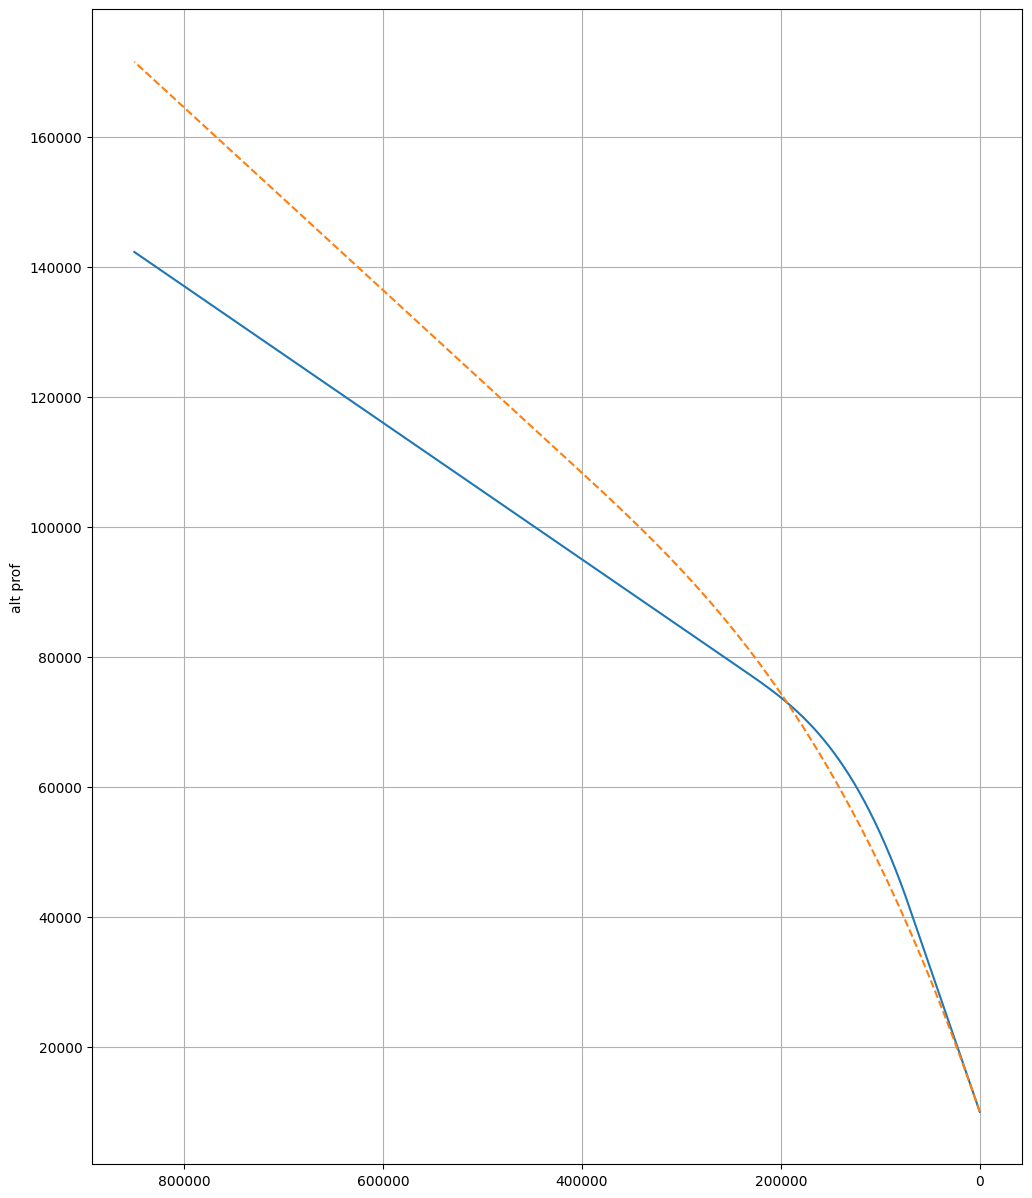

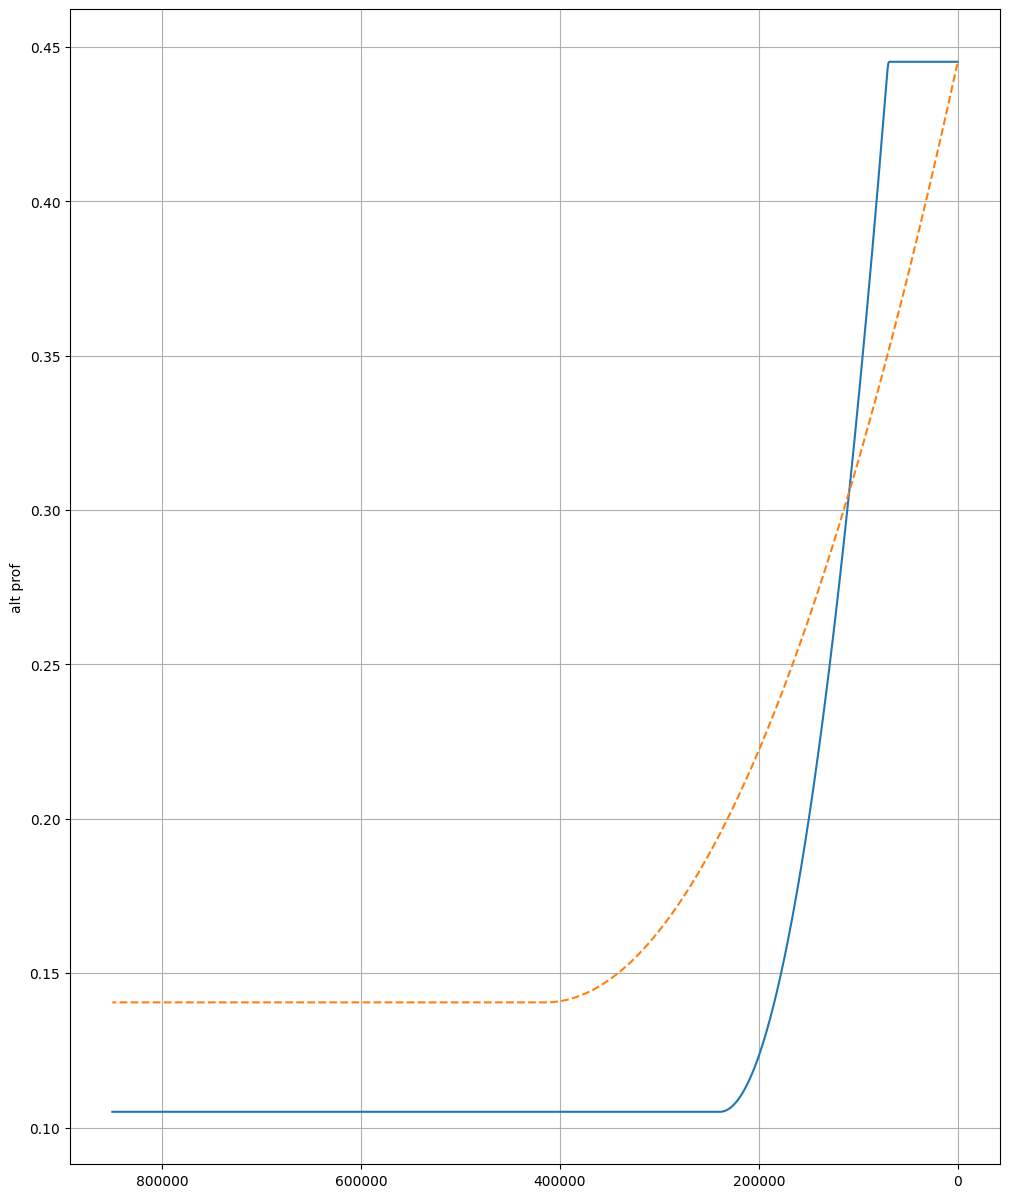

In [50]:
def ogs_(drpred):
    hali = 10018
    tggs = 0.44522869
    return hali + tggs * drpred

def href_0(drpred):

    tggs = 0.44522869
    pbgc = 0.14054
    hali = 10018
    pbrc_fit = [256527.82, 1320895.49875, 0.3249196962]
    pbhc_fit = [90000, 170534.500266, 0.3249196962]

    pbrc = [0, 0]
    pbhc = [0, 0]

    pbrc[0] = 0
    pbhc[0] = hali + pbrc[0] * tggs

    pbrc[1] = pbrc_fit[0] + pbrc_fit[1] * (tggs - pbrc_fit[2])
    pbhc[1] = pbhc_fit[0] + pbhc_fit[1] * (tggs - pbhc_fit[2])


    dpbrc = pbrc[1] -  pbrc[0]
    dpbhc = pbhc[1] -  pbhc[0]

    chi = dpbhc / (dpbrc**2) - tggs / dpbrc
    th = (pbgc - tggs) / (2*dpbrc)

    cubic_c3 = 3*chi - 2*th
    cubic_c4 = 2*(th - chi) / dpbrc
    
    if (drpred > pbrc[1]):
        return pbhc[1] + pbgc * (drpred - pbrc[1])
    elif (drpred < pbrc[0]):
        return hali + tggs * drpred
    else:
        drpred_1 = drpred -  pbrc[0]
        return pbhc[0] + tggs * drpred_1 + (cubic_c3 + drpred_1 * cubic_c4) * drpred_1**2

def href_(drpred):

    tggs = 0.44522869
    pbgc = 0.14054
    hali = 10018

    tggs = 0.44522869
    pbgc = 0.1051042353
    hali = 10018

    pbrc = [0, 0]
    pbhc = [0, 0]

    pbrc[0] = 70000
    pbhc[0] = hali + pbrc[0] * tggs

    pbrc[1] = 239527.82
    pbhc[1] = 78161.826


    dpbrc = pbrc[1] -  pbrc[0]
    dpbhc = pbhc[1] -  pbhc[0]

    chi = dpbhc / (dpbrc**2) - tggs / dpbrc
    th = (pbgc - tggs) / (2*dpbrc)

    cubic_c3 = 3*chi - 2*th
    cubic_c4 = 2*(th - chi) / dpbrc
    
    if (drpred > pbrc[1]):
        return pbhc[1] + pbgc * (drpred - pbrc[1])
    elif (drpred < pbrc[0]):
        return hali + tggs * drpred
    else:
        drpred_1 = drpred -  pbrc[0]
        return pbhc[0] + tggs * drpred_1 + (cubic_c3 + drpred_1 * cubic_c4) * drpred_1**2



drpred = np.linspace(0, 850000, 1000)


href = [href_(r) for r in drpred]
href0 = [href_0(r) for r in drpred]



fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.plot(drpred, href)
plt_.plot(drpred, href0, '--')

plt_.set_ylabel('alt prof')
plt_.grid()


plt_.invert_xaxis()



dhdr = np.gradient(href, drpred)
dh0dr = np.gradient(href0, drpred)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.plot(drpred, dhdr)
plt_.plot(drpred, dh0dr, '--')

plt_.set_ylabel('alt prof')
plt_.grid()



plt_.invert_xaxis()



Text(0, 0.5, 'EOW')

Text(0, 0.5, 'EOW')

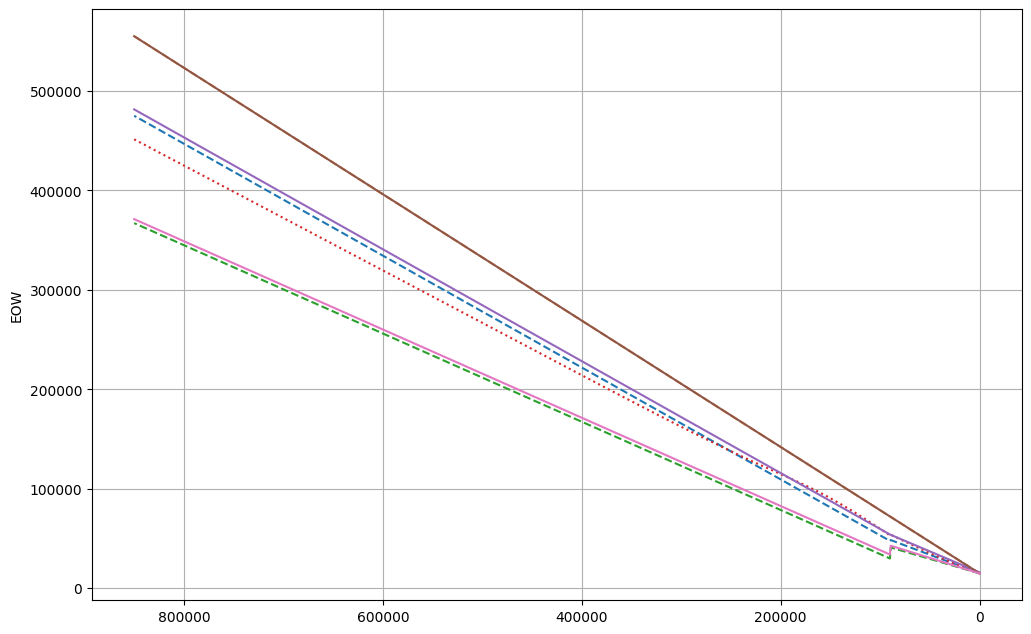

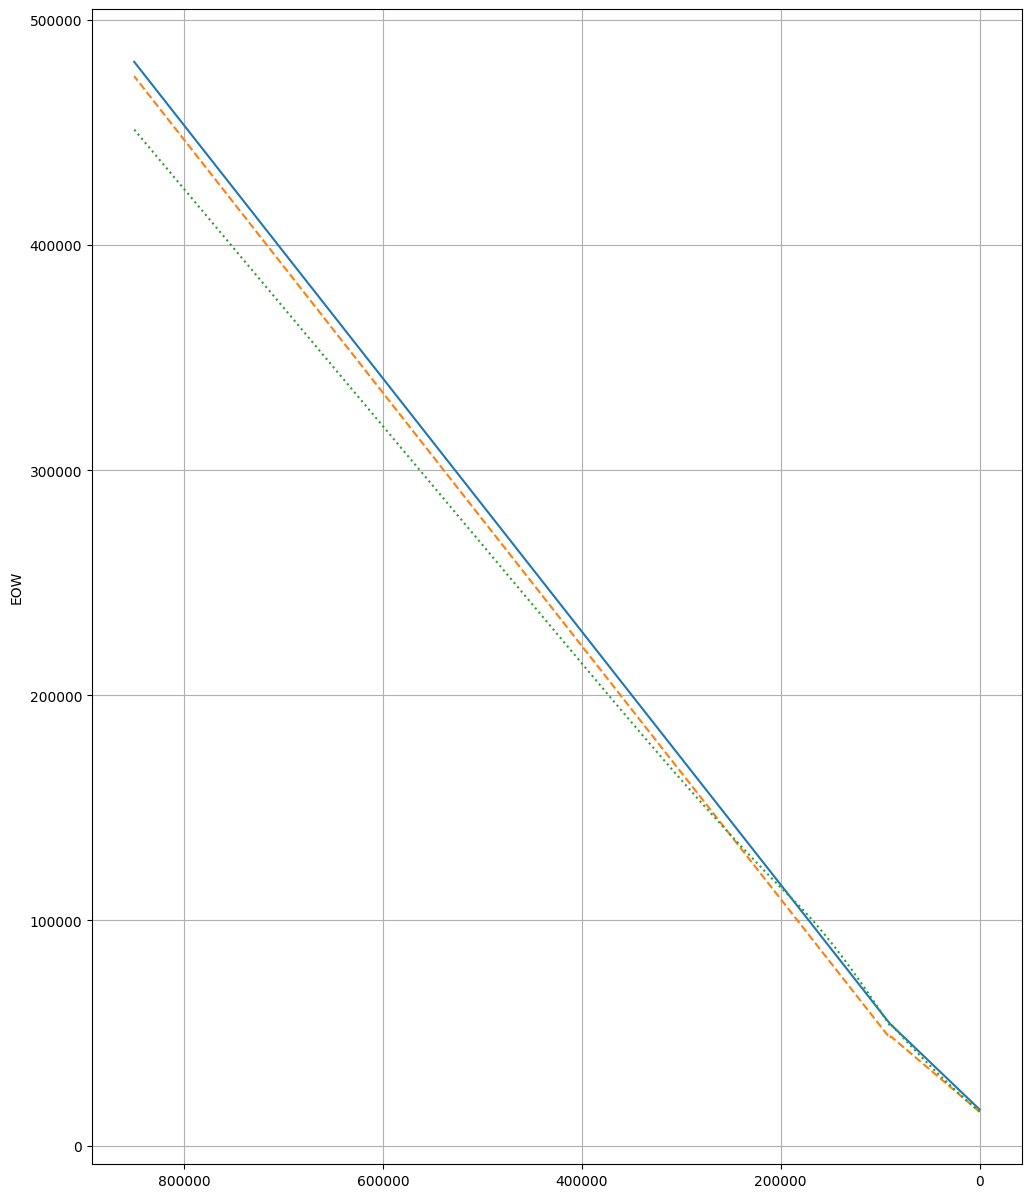

In [39]:


def en_0(drpred):

    en_c1 = [-3000, 15000]
    en_c2 = [0.5625, 0.375]
    
    eow_spt = 90000
    
    iel = 0
    if (drpred < eow_spt):
        iel = 1
    
    en = en_c1[iel] + drpred * en_c2[iel] 
    
    return en


def es_0(drpred):
    
    es_c1 = [15000, 15000]
    es_c2 = [0.635416, 0.635416]
    
    eow_spt = 90000
    
    iel = 0
    if (drpred < eow_spt):
        iel = 1
    
    es = es_c1[iel] + drpred * es_c2[iel] 
    
    return es

def emep_0(drpred):
    
    emep_c1 = [-10000, 15000]
    emep_c2 = [0.44375, 0.29168]
    
    eow_spt = 90000
    
    iel = 0
    if (drpred < eow_spt):
        iel = 1
    
    emep = emep_c1[iel] + drpred * emep_c2[iel] 
    
    return emep



def en2_(drpred):
    
    en_c1 = [3400, 16000]
    en_c2 = [0.5625, 0.4225]
    
    eow_spt = 90000
    
    iel = 0
    if (drpred < eow_spt):
        iel = 1
    
    en = en_c1[iel] + drpred * en_c2[iel] 
    
    return en


def es2_(drpred):
    
    es_c1 = [15000, 15000]
    es_c2 = [0.635416, 0.635416]

    eow_spt = 90000

    iel = 0
    if (drpred < eow_spt):
        iel = 1
    
    es = es_c1[iel] + drpred * es_c2[iel] 
    
    
    return es

def emep2_(drpred):
    
    emep_c1 = [-6000, 15000]
    emep_c2 = [0.44375, 0.31168]
    
    eow_spt = 90000
    
    iel = 0
    if (drpred < eow_spt):
        iel = 1
    
    emep = emep_c1[iel] + drpred * emep_c2[iel] 
    
    return emep



drpred = np.linspace(0, 850000, 1000)

en0 = [en_0(r) for r in drpred]
emep0 = [emep_0(r) for r in drpred]
es0 = [es_0(r) for r in drpred]

en2 = [en2_(r) for r in drpred]
emep2 = [emep2_(r) for r in drpred]
es2 = [es2_(r) for r in drpred]


eow_spd_0 = np.array(en0) - np.array(href0)

encorr = href + eow_spd_0


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.set_ylabel('EOW')
plt_.grid()

plt_.set_aspect('equal')

plt_.invert_xaxis()

plt.plot(drpred, en0, '--')
plt.plot(drpred, es0, '--')
plt.plot(drpred, emep0, '--')

plt.plot(drpred, encorr, ':')

plt_.plot(drpred, en2)
plt_.plot(drpred, es2)
plt_.plot(drpred, emep2)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.set_ylabel('EOW')
plt_.grid()

plt_.invert_xaxis()


plt_.plot(drpred, en2)
plt.plot(drpred, en0, '--')
plt.plot(drpred, encorr, ':')